In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nose.tools import *

from scipy.stats import ttest_ind

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
happiness_by_country_2015 = pd.read_csv("2015.csv")
happiness_by_country_2015.drop('Standard Error', inplace=True, axis=1)
happiness_by_country_2015.drop('Dystopia Residual', inplace=True, axis=1)
happiness_by_country_2015.drop('Region', inplace=True, axis=1)
happiness_by_country_2015.drop('Generosity', inplace=True, axis=1)
happiness_by_country_2015.columns
happiness_by_country_2015.shape
happiness_by_country_2015['Health (Life Expectancy)'] = happiness_by_country_2015['Health (Life Expectancy)'] * 100

In [4]:
happiness_by_country_2016 = pd.read_csv("2016.csv")
happiness_by_country_2016.drop('Lower Confidence Interval', inplace=True, axis=1)
happiness_by_country_2016.drop('Upper Confidence Interval', inplace=True, axis=1)
happiness_by_country_2016.drop('Dystopia Residual', inplace=True, axis=1)
happiness_by_country_2016.drop('Region', inplace=True, axis=1)
happiness_by_country_2016.drop('Generosity', inplace=True, axis=1)
happiness_by_country_2016.columns
happiness_by_country_2016.shape
happiness_by_country_2016['Health (Life Expectancy)'] = happiness_by_country_2016['Health (Life Expectancy)'] * 100

In [5]:
happiness_by_country_2017 = pd.read_csv("2017.csv")
happiness_by_country_2017.drop('Whisker.high', inplace=True, axis=1)
happiness_by_country_2017.drop('Whisker.low', inplace=True, axis=1)
happiness_by_country_2017.drop('Dystopia.Residual', inplace=True, axis=1)
happiness_by_country_2017.columns = ['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']
happiness_by_country_2017.columns
happiness_by_country_2017.shape
happiness_by_country_2017['Health (Life Expectancy)'] = happiness_by_country_2017['Health (Life Expectancy)'] * 100
happiness_by_country_2017.drop('Generosity', inplace=True, axis=1)

In [6]:
happiness_by_country_2018 = pd.read_csv("2018.csv")
happiness_by_country_2018.columns = ['Happiness Rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)']
happiness_by_country_2018.columns
happiness_by_country_2018.shape
happiness_by_country_2018['Health (Life Expectancy)'] = happiness_by_country_2018['Health (Life Expectancy)'] * 100
happiness_by_country_2018.drop('Generosity', inplace=True, axis=1)

In [7]:
happiness_by_country_2019 = pd.read_csv("2019.csv")
happiness_by_country_2019.columns
happiness_by_country_2019.columns = ['Happiness Rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)']
happiness_by_country_2019['Health (Life Expectancy)'] = happiness_by_country_2019['Health (Life Expectancy)'] * 100
happiness_by_country_2019.drop('Generosity', inplace=True, axis=1)

In [8]:
# happiness_by_country_2020 = pd.read_csv("2020.csv")
# happiness_by_country_2020.drop('Standard error of ladder score', inplace=True, axis=1)
# happiness_by_country_2020.drop('upperwhisker', inplace=True, axis=1)
# happiness_by_country_2020.drop('lowerwhisker', inplace=True, axis=1)
# happiness_by_country_2020.drop('Ladder score in Dystopia', inplace=True, axis=1)
# happiness_by_country_2020.drop('Explained by: Log GDP per capita', inplace=True, axis=1)
# happiness_by_country_2020.drop('Explained by: Social support', inplace=True, axis=1)
# happiness_by_country_2020.drop('Explained by: Healthy life expectancy', inplace=True, axis=1)
# happiness_by_country_2020.drop('Explained by: Freedom to make life choices', inplace=True, axis=1)
# happiness_by_country_2020.drop('Explained by: Generosity', inplace=True, axis=1)
# happiness_by_country_2020.drop('Explained by: Perceptions of corruption', inplace=True, axis=1)
# happiness_by_country_2020.drop('Dystopia + residual', inplace=True, axis=1)
# happiness_by_country_2020.drop('Regional indicator', inplace=True, axis=1)

# happiness_by_country_2020.columns= ['Country', 'Happiness Score',
#        'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
#        'Freedom', 'Generosity', 'Trust (Government Corruption)']
# happiness_by_country_2020['Economy (GDP per Capita)'] = happiness_by_country_2020['Economy (GDP per Capita)']/10
# happiness_by_country_2020.drop('Generosity', inplace=True, axis=1)

# happiness_by_country_2020.sort_values(by = ['Happiness Score'], axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last', ignore_index=False, key=None)
# happiness_by_country_2020["Happiness Rank"] = happiness_by_country_2020.index
# happiness_by_country_2020["Happiness Rank"] = happiness_by_country_2020["Happiness Rank"] + 1

In [9]:
# happiness_by_country_2021 = pd.read_csv("2021.csv")
# happiness_by_country_2021.drop('Regional indicator', inplace=True, axis=1)
# happiness_by_country_2021.drop('Standard error of ladder score', inplace=True, axis=1)
# happiness_by_country_2021.drop('upperwhisker', inplace=True, axis=1)
# happiness_by_country_2021.drop('lowerwhisker', inplace=True, axis=1)
# happiness_by_country_2021.drop('Ladder score in Dystopia', inplace=True, axis=1)
# happiness_by_country_2021.drop('Explained by: Log GDP per capita', inplace=True, axis=1)
# happiness_by_country_2021.drop('Explained by: Social support', inplace=True, axis=1)
# happiness_by_country_2021.drop('Explained by: Healthy life expectancy', inplace=True, axis=1)
# happiness_by_country_2021.drop('Explained by: Freedom to make life choices', inplace=True, axis=1)
# happiness_by_country_2021.drop('Explained by: Generosity', inplace=True, axis=1)
# happiness_by_country_2021.drop('Explained by: Perceptions of corruption', inplace=True, axis=1)
# happiness_by_country_2021.drop('Dystopia + residual', inplace=True, axis=1)

# happiness_by_country_2021.columns =  ['Country', 'Happiness Score',
#        'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
#        'Freedom', 'Generosity', 'Trust (Government Corruption)']
# happiness_by_country_2021.drop('Generosity', inplace=True, axis=1)
# happiness_by_country_2021['Economy (GDP per Capita)'] = happiness_by_country_2021['Economy (GDP per Capita)']/10
# happiness_by_country_2021.sort_values(by = ['Happiness Score'], axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last', ignore_index=False, key=None)
# happiness_by_country_2021["Happiness Rank"] = happiness_by_country_2021.index
# happiness_by_country_2021["Happiness Rank"] = happiness_by_country_2021["Happiness Rank"] + 1

In [10]:
happiness_by_country_2015["year"] = 2015
happiness_by_country_2016["year"] = 2016
happiness_by_country_2017["year"] = 2017
happiness_by_country_2018["year"] = 2018
happiness_by_country_2019["year"] = 2019
# happiness_by_country_2020["year"] = 2020
# happiness_by_country_2021["year"] = 2021

In [11]:
frames = [happiness_by_country_2015, happiness_by_country_2016, happiness_by_country_2017, happiness_by_country_2018, happiness_by_country_2019]#, happiness_by_country_2020, happiness_by_country_2021]
from_2015_to_2021_df = pd.concat(frames)
from_2015_to_2021_df = from_2015_to_2021_df.set_index('Happiness Rank')

In [12]:
from_2015_to_2021_df.sort_values(by = ['Happiness Score'], axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last', key=None)
from_2015_to_2021_df.sort_values(by = ['Happiness Rank'], axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last', key=None)

In [13]:
from_2015_to_2021_df

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),year
Happiness Rank,,,,,,,,
1,Finland,7.769,1.340000,1.587000,98.60000,0.596000,0.393000,2019
1,Finland,7.632,1.305000,1.592000,87.40000,0.681000,0.393000,2018
1,Denmark,7.526,1.441780,1.163740,79.50400,0.579410,0.444530,2016
1,Switzerland,7.587,1.396510,1.349510,94.14300,0.665570,0.419780,2015
1,Norway,7.537,1.616463,1.533524,79.66665,0.635423,0.362012,2017
...,...,...,...,...,...,...,...,...
156,Burundi,2.905,0.091000,0.627000,14.50000,0.065000,0.076000,2018
156,South Sudan,2.853,0.306000,0.575000,29.50000,0.010000,0.091000,2019
157,Burundi,2.905,0.015300,0.415870,22.39600,0.118500,0.100620,2015


In [14]:
new_df = pd.read_csv('data.csv')

filtred_df = new_df[new_df['ReportingYear'] >= 2015]

new_filtered = filtred_df[['CountryOrTerritory','ReportingYear','AQValue']]
new_filtered = new_filtered[(new_filtered != 0.0).all(1)]

result_AQValue = new_filtered.groupby(['CountryOrTerritory','ReportingYear'], as_index = False)['AQValue'].mean()
result_AQValue['CountryOrTerritory'].replace('Kosovo (under UNSCR 1244/99)',"Kosovo", inplace=True)
result_AQValue.columns=["Country",'year','AQValue']
result_AQValue[result_AQValue['Country'] == 'Albania']

,Country,year,AQValue
0,Albania,2015,1321.349201
1,Albania,2016,1059.252584
2,Albania,2017,557.136266
3,Albania,2018,50.777043
4,Albania,2019,530.368511


In [15]:
merged_df = pd.merge(result_AQValue, from_2015_to_2021_df)
merged_df[merged_df['Country'] == "Bulgaria"]

,Country,year,AQValue,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption)
20,Bulgaria,2015,942.188141,4.218,1.012160,1.106140,76.649000,0.305870,0.008720
21,Bulgaria,2016,756.210497,4.217,1.113060,0.925420,67.806000,0.212190,0.006150
22,Bulgaria,2017,691.692756,4.714,1.161459,1.434379,70.821768,0.289232,0.113178
23,Bulgaria,2018,609.919711,4.933,1.054000,1.515000,71.200000,0.359000,0.009000
24,Bulgaria,2019,262.758788,5.011,1.092000,1.513000,81.500000,0.311000,0.004000


In [16]:
merged_df.sort_values(by = ['Happiness Score'], axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last', key=None)
merged_df = merged_df.reset_index(drop=True)
merged_df["Happiness Rank"] = merged_df.index + 1
merged_df = merged_df.set_index("Happiness Rank")

In [17]:
merged_df.corr()

,year,AQValue,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption)
year,1.000000,-0.218572,0.094219,0.040544,0.496257,0.324249,0.038086,-0.061107
AQValue,-0.218572,1.000000,-0.284840,-0.328694,-0.458335,-0.154953,-0.134898,0.045895
Happiness Score,0.094219,-0.284840,1.000000,0.798927,0.609475,0.567813,0.766989,0.680904
Economy (GDP per Capita),0.040544,-0.328694,0.798927,1.000000,0.553158,0.485064,0.611795,0.583587
Family,0.496257,-0.458335,0.609475,0.553158,1.000000,0.497948,0.489154,0.265473
Health (Life Expectancy),0.324249,-0.154953,0.567813,0.485064,0.497948,1.000000,0.466910,0.254955
Freedom,0.038086,-0.134898,0.766989,0.611795,0.489154,0.466910,1.000000,0.643825
Trust (Government Corruption),-0.061107,0.045895,0.680904,0.583587,0.265473,0.254955,0.643825,1.000000


In [18]:
merged_df["Happiness Score"].min(), merged_df["Happiness Score"].max()

(4.217, 7.769)

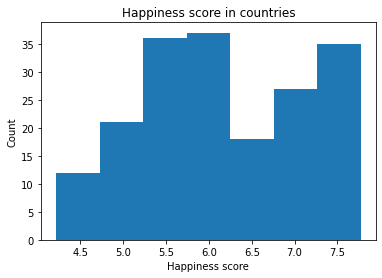

In [19]:
plt.hist(merged_df["Happiness Score"], bins = "fd")

plt.title("Happiness score in countries")
plt.xlabel("Happiness score")
plt.ylabel("Count")
plt.show()

In [20]:
merged_df["Happiness Score"].skew()

-0.014320918507762324

In [21]:
mean_value = merged_df['Happiness Score'].mean()
mean_value

6.1568118291670295

In [22]:
median_value = np.median(merged_df['Happiness Score'])
median_value

5.9975000000000005

Here as out distribution has little skew we can use both the mean or the median of it. In that case we will use the median. 

In [23]:
most_happy_countries = merged_df[merged_df['Happiness Score'] > median_value]

In [24]:
most_sad_countries = merged_df[merged_df['Happiness Score'] <= median_value]

In [25]:
len(most_happy_countries),len(most_sad_countries)

(93, 93)

We can see that we had perfectly separated the countries into two groups

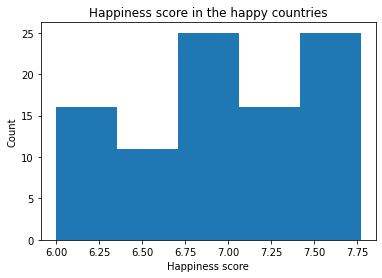

In [26]:
plt.hist(most_happy_countries["Happiness Score"], bins = "fd")

plt.title("Happiness score in the happy countries")
plt.xlabel("Happiness score")
plt.ylabel("Count")
plt.show()

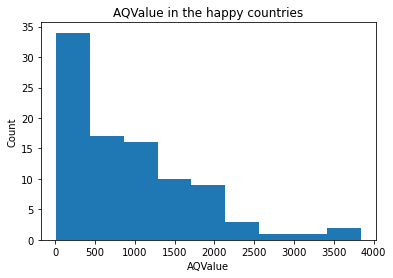

In [27]:
plt.hist(most_happy_countries["AQValue"], bins = "fd")

plt.title("AQValue in the happy countries")
plt.xlabel("AQValue")
plt.ylabel("Count")
plt.show()

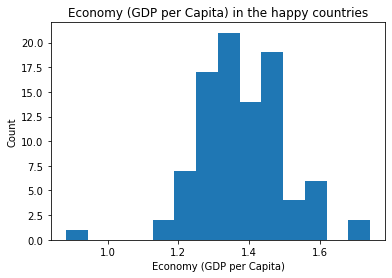

In [28]:
plt.hist(most_happy_countries["Economy (GDP per Capita)"], bins = "fd")

plt.title("Economy (GDP per Capita) in the happy countries")
plt.xlabel("Economy (GDP per Capita)")
plt.ylabel("Count")
plt.show()

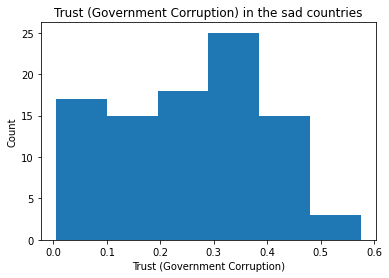

In [29]:
plt.hist(most_happy_countries["Trust (Government Corruption)"], bins = "fd")

plt.title("Trust (Government Corruption) in the sad countries")
plt.xlabel("Trust (Government Corruption)")
plt.ylabel("Count")
plt.show()

Histograms for the sad half of the countries

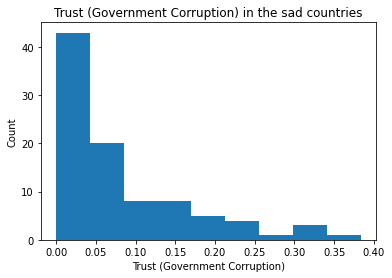

In [30]:
plt.hist(most_sad_countries["Trust (Government Corruption)"], bins = "fd")

plt.title("Trust (Government Corruption) in the sad countries")
plt.xlabel("Trust (Government Corruption)")
plt.ylabel("Count")
plt.show()

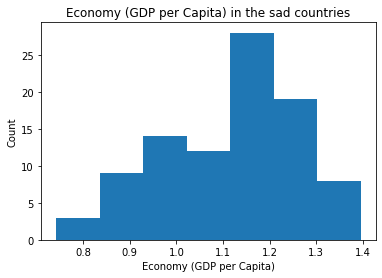

In [31]:
plt.hist(most_sad_countries["Economy (GDP per Capita)"], bins = "fd")

plt.title("Economy (GDP per Capita) in the sad countries")
plt.xlabel("Economy (GDP per Capita)")
plt.ylabel("Count")
plt.show()

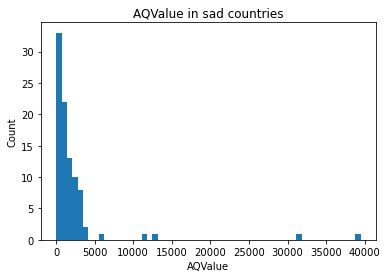

In [32]:
plt.hist(most_sad_countries["AQValue"], bins = "fd")

plt.title("AQValue in sad countries")
plt.xlabel("AQValue")
plt.ylabel("Count")
plt.show()

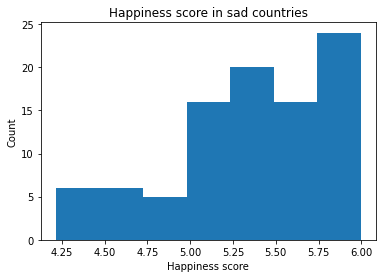

In [33]:
plt.hist(most_sad_countries["Happiness Score"], bins = "fd")

plt.title("Happiness score in sad countries")
plt.xlabel("Happiness score")
plt.ylabel("Count")
plt.show()

In [34]:
most_sad_countries.corr()

,year,AQValue,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption)
year,1.000000,-0.248945,0.114029,0.027875,0.464498,0.208171,0.096644,-0.017762
AQValue,-0.248945,1.000000,-0.362932,-0.386213,-0.492842,-0.080697,-0.021728,0.396630
Happiness Score,0.114029,-0.362932,1.000000,0.594547,0.580574,0.152890,0.217696,-0.160911
Economy (GDP per Capita),0.027875,-0.386213,0.594547,1.000000,0.502035,0.269410,0.181552,-0.103534
Family,0.464498,-0.492842,0.580574,0.502035,1.000000,0.242301,0.265090,-0.172471
Health (Life Expectancy),0.208171,-0.080697,0.152890,0.269410,0.242301,1.000000,0.143728,-0.292503
Freedom,0.096644,-0.021728,0.217696,0.181552,0.265090,0.143728,1.000000,0.104929
Trust (Government Corruption),-0.017762,0.396630,-0.160911,-0.103534,-0.172471,-0.292503,0.104929,1.000000


In [35]:
most_happy_countries.corr()

,year,AQValue,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption)
year,1.000000,-0.283316,-0.160089,-0.177244,0.627346,0.431691,-0.284477,-0.276232
AQValue,-0.283316,1.000000,-0.199458,0.006894,-0.177300,-0.016751,0.001679,-0.102951
Happiness Score,-0.160089,-0.199458,1.000000,0.517864,0.134446,0.103512,0.750187,0.725341
Economy (GDP per Capita),-0.177244,0.006894,0.517864,1.000000,-0.029826,-0.088771,0.349759,0.601050
Family,0.627346,-0.177300,0.134446,-0.029826,1.000000,0.367420,0.112211,0.038870
Health (Life Expectancy),0.431691,-0.016751,0.103512,-0.088771,0.367420,1.000000,-0.011253,-0.094381
Freedom,-0.284477,0.001679,0.750187,0.349759,0.112211,-0.011253,1.000000,0.661946
Trust (Government Corruption),-0.276232,-0.102951,0.725341,0.601050,0.038870,-0.094381,0.661946,1.000000


да изследвам примерно някакви разпределения при най-щастливите хора от другите категории


да изследвам примерно някакви разпределения при най-нещастните хора от другите категории


да видя страните с хора с високи доходи дали са по-замърсени и т.н.

In [36]:
print(f"{len(merged_df[merged_df['Happiness Score'] <= 5.999]) / len(merged_df) * 100:.2f}% is below 5.999 of happiness score") 

50.00% is below 5.999 of happiness score


<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

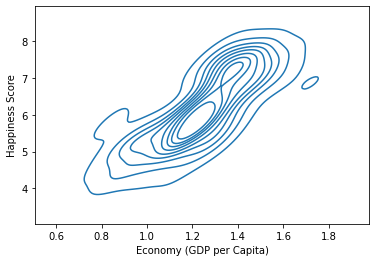

In [37]:
sns.kdeplot(data=merged_df, x="Economy (GDP per Capita)", y="Happiness Score")

In [79]:
Northern_Europe = ["Denmark", "Finland", "Iceland", "Norway", "Sweden"]
Western_Europe = ["Belgium", "France", "Liechtenstein", "Monaco", "Netherlands","United Kingdom","Ireland"]
Central_Europe = ["Croatia", "Czech Republic", "Hungary", "Poland", "Slovakia", "Slovenia", "Germany", "Luxembourg", "Switzerland","Austria"]
Southwest_Europe = ["Spain","Portugal"]
Southern_Europe = ["Greece","Italy","Malta"]
Southeast_Europe = ["Bulgaria","Albania","Bosnia and Herzegovina", "Kosovo", "Montenegro", "North Macedonia", "Romania","Serbia","Turkey", "Cyprus"]
Eastern_Europe = ["Lithuania", "Latvia", "Estonia","Georgia"]

In [62]:
merged_df[merged_df["Country"] == "North Macedonia"]

,Country,year,AQValue,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Continent
Happiness Rank,,,,,,,,,,
152,North Macedonia,2019,455.155565,5.274,0.983,1.294,83.8,0.345,0.034,other


In [77]:
def GetConti(country):
    if country in Northern_Europe:
        return "Northern_Europe"
    elif country in Western_Europe:
        return "Western_Europe"
    elif country in Central_Europe:
        return "Central_Europe"
    elif country in Southwest_Europe:
        return "Southwest_Europe"
    elif country in Southern_Europe:
        return "Southern_Europe"
    elif country in Southeast_Europe:
        return "Southeast_Europe"
    elif country in Eastern_Europe:
        return "Eastern_Europe"
    else:
        return "other"

In [82]:
# = pd.DataFrame({"Country": ["Sweden", "Africa", "Africa", "Germany", "Germany", "UK","Pakistan"]})
merged_df['Region'] = merged_df['Country'].apply(lambda x: GetConti(x))
merged_df

,Country,year,AQValue,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Continent,Region
Happiness Rank,,,,,,,,,,,
1,Finland,2019,173.544281,7.769,1.340000,1.587000,98.600000,0.59600,0.393000,Europe,Northern_Europe
2,Finland,2018,546.472062,7.632,1.305000,1.592000,87.400000,0.68100,0.393000,Europe,Northern_Europe
3,Denmark,2019,272.076567,7.600,1.383000,1.573000,99.600000,0.59200,0.410000,Europe,Northern_Europe
4,Norway,2018,365.326673,7.594,1.456000,1.582000,86.100000,0.68600,0.340000,Europe,Northern_Europe
5,Switzerland,2015,3833.702692,7.587,1.396510,1.349510,94.143000,0.66557,0.419780,Europe,Central_Europe
...,...,...,...,...,...,...,...,...,...,...,...
182,Georgia,2015,39455.499887,4.297,0.741900,0.385620,72.926000,0.40577,0.383310,other,Eastern_Europe
183,Georgia,2017,11193.157232,4.286,0.950613,0.570615,64.954698,0.30941,0.054009,other,Eastern_Europe
184,Georgia,2016,31689.226639,4.252,0.837920,0.192490,64.035000,0.32461,0.318800,other,Eastern_Europe


Now we can test more hypothesis. For example let's check if the region is correlated with the amount of consumed alcohol.